In [12]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
p4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P2_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26bf44645d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26bf4465850>,
 'boxes': [<matplotlib.lines.Line2D at 0x26bf4463150>],
 'medians': [<matplotlib.lines.Line2D at 0x26bf4466e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x26bf4467810>],
 'means': []}

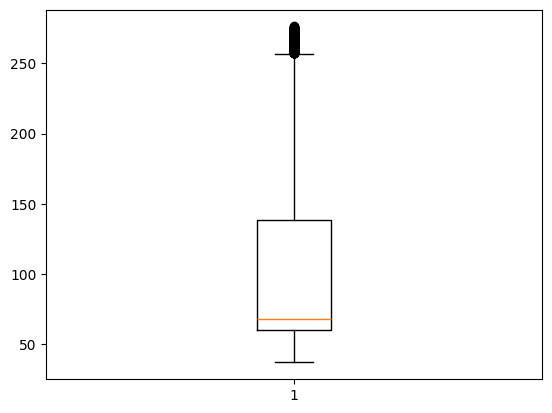

In [14]:
plt.boxplot(p4["RHeel_pos_Z"])

In [16]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in p4.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 70:
        bValley = False
        for i in range(1,80):
            if frame == 161:
                breakpoint()
            before = p4.loc[frame-i,"RHeel_pos_Z"]
            next = p4.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  211 :  44.167
R -  324 :  43.986
R -  426 :  40.939
R -  532 :  38.849
R -  640 :  44.114
R -  746 :  48.9
R -  853 :  49.998
R -  963 :  48.816
R -  1073 :  47.379
R -  1180 :  40.178
R -  1285 :  43.772
R -  1394 :  41.674
R -  1502 :  39.124
R -  1616 :  43.925
R -  1720 :  48.003
R -  1828 :  51.07
R -  1936 :  50.35
R -  2048 :  49.634
R -  2159 :  43.215
R -  2268 :  42.095
R -  2377 :  42.416
R -  2486 :  36.909
R -  2595 :  42.854
R -  2704 :  47.926
R -  2812 :  51.33
R -  2925 :  49.613
R -  3038 :  49.613
R -  3151 :  46.081
R -  3263 :  40.297
R -  3375 :  42.942
R -  3487 :  40.13
R -  3600 :  41.797
R -  3710 :  46.387
R -  3824 :  49.905
R -  3936 :  51.724
R -  4050 :  50.167
R -  4166 :  46.93
R -  4280 :  42.73
R -  4394 :  44.074
R -  4508 :  41.913
R -  4622 :  39.072
R -  4741 :  44.594
R -  4853 :  48.375
R -  4959 :  50.443
R -  5060 :  48.626
R -  5165 :  49.1
R -  5271 :  43.534
R -  5376 :  44.005
R -  5489 :  44.835
R -  5603 :  45.632
R -  5708 :  45.76

KeyError: 9858

In [17]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in p4.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 70:
        for i in range(1,80):
            before = p4.loc[frame-i,"LHeel_pos_Z"]
            next = p4.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  161 :  54.7
L -  270 :  33.289
L -  375 :  35.756
L -  479 :  32.733
L -  585 :  36.802
L -  692 :  42.052
L -  799 :  44.831
L -  908 :  42.329
L -  1017 :  42.739
L -  1125 :  38.036
L -  1231 :  33.344
L -  1338 :  37.973
L -  1446 :  33.63
L -  1557 :  35.497
L -  1666 :  41.316
L -  1773 :  45.476
L -  1881 :  41.791
L -  1992 :  43.499
L -  2103 :  41.16
L -  2214 :  36.677
L -  2322 :  37.581
L -  2431 :  34.512
L -  2539 :  33.618
L -  2649 :  41.8
L -  2756 :  45.562
L -  2867 :  44.5
L -  2981 :  42.047
L -  3094 :  42.205
L -  3206 :  37.545
L -  3317 :  37.298
L -  3430 :  35.406
L -  3543 :  32.314
L -  3654 :  38.893
L -  3766 :  43.122
L -  3881 :  46.088
L -  3994 :  42.206
L -  4108 :  42.481
L -  4222 :  39.838
L -  4336 :  32.566
L -  4452 :  36.841
L -  4564 :  33.544
L -  4680 :  36.714
L -  4797 :  42.028
L -  4905 :  46.336
L -  5009 :  43.143
L -  5113 :  42.865
L -  5217 :  40.228
L -  5322 :  33.876
L -  5429 :  38.175
L -  5545 :  36.154
L -  5654 :  36.

In [18]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [19]:
steps = pd.DataFrame(steps)
steps

,0,1
0,161,54.700
1,211,44.167
2,270,33.289
3,324,43.986
4,375,35.756
...,...,...
166,9498,45.328
167,9556,50.152
168,9614,42.458
169,9676,49.736


In [20]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [21]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [22]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [23]:
start_music[start_music[0]=='P2_M2'][1].item()

5200.0

In [24]:
#Update TIme Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+start_music[start_music[0]=='P2_M1'][1].item()
m2[0] = (m2[0]*100)+start_music[start_music[0]=='P2_M2'][1].item()
m3[0] = (m3[0]*100)+start_music[start_music[0]=='P2_M3'][1].item()

In [25]:
m2

,0,1
1,5385.179138,80.7495BPM
2,5459.482993,80.7495BPM
3,5533.786848,80.7495BPM
4,5608.090703,80.7495BPM
5,5684.716553,78.3026BPM
6,5760.181406,79.5072BPM
7,5835.646258,79.5072BPM
8,5911.111111,79.5072BPM
9,5984.253968,82.0313BPM
10,6058.557823,80.7495BPM


(0.0, 9800.0)

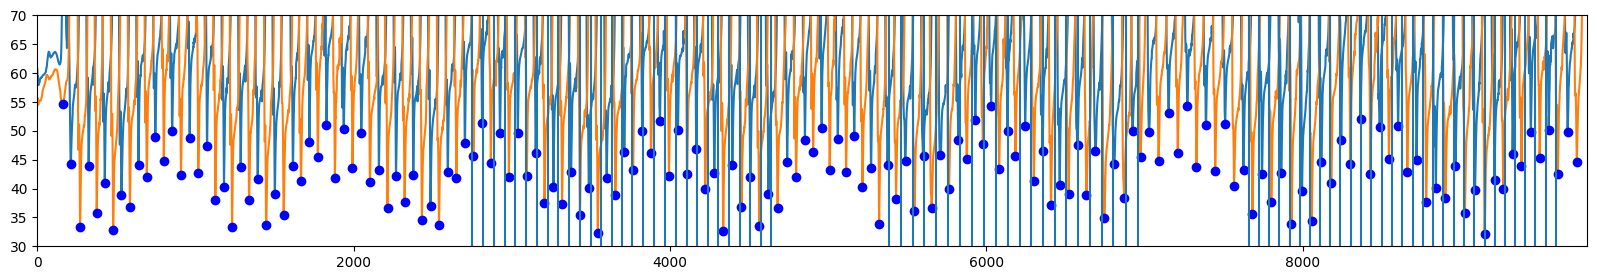

In [26]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([30, 70])
plt.xlim([0, 9800])

In [27]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

107.86429557568752

In [28]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

108.0

# P2 - M1

In [71]:
m1_start = start_music[start_music[0]=='P2_M1'][1].item()
m1_end = start_music[start_music[0]=='P2_M2'][1].item()-500
print(m1_start)
print(m1_end)

2600.0
4700.0


In [72]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [31]:
steps_in_m1_range.count()

37

In [32]:
beats_in_m1_range.count()

28

In [83]:
(29/20)*60

87.0

In [84]:
(34/20)*60

102.0

In [85]:
beats_in_m1_range

1     2750.349206
2     2818.848073
3     2887.346939
4     2955.845805
5     3022.022676
6     3089.360544
7     3156.698413
8     3226.358277
9     3294.857143
10    3363.356009
11    3431.854875
12    3498.031746
13    3565.369614
14    3632.707483
15    3697.723356
16    3762.739229
17    3831.238095
18    3900.897959
19    3969.396825
20    4037.895692
21    4106.394558
22    4172.571429
23    4237.587302
24    4303.764172
25    4372.263038
26    4439.600907
27    4506.938775
28    4574.276644
29    4641.614513
Name: 0, dtype: float64

In [73]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100)*60

92.00189916749818

In [74]:
steps_in_m1_range.count()

37

In [75]:
steps_in_m1_range.max()-steps_in_m1_range.min()

2031

In [89]:
(34/(1866/100))*60

109.32475884244373

In [76]:
#all WALKING M1
steps_in_m1_range.count()/((m1_end-m1_start)/100)*60

105.71428571428571

In [77]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [78]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [37]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100)*60

109.60518562168534

In [38]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100)*60

92.9345435870666

In [39]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

373.54624229999996

In [40]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [28, 37]

(2500.0, 4640.0)

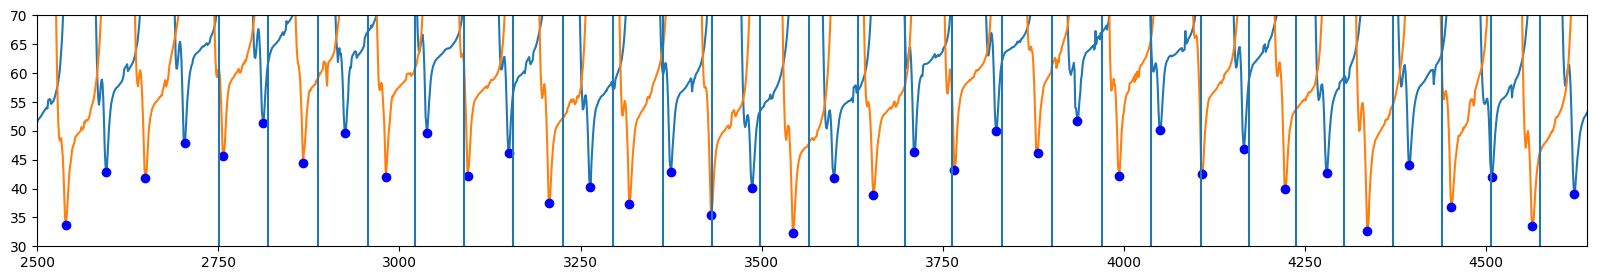

In [41]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([30, 70])
plt.xlim([m1_start-20, m1_end+20])

# P2 - M2

In [79]:
m2_start = start_music[start_music[0]=='P2_M2'][1].item()
m2_end = start_music[start_music[0]=='P2_M3'][1].item()-500
print(m2_start)
print(m2_end)

5200.0
7000.0


In [80]:
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [81]:
#all MUSIC M1
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [89]:
#all WALKING M2
steps_in_m2_range.count()/((m2_end-m2_start)/100)*60

110.0

In [83]:
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [84]:
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [85]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

113.2075471698113

In [86]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

(5180.0, 7020.0)

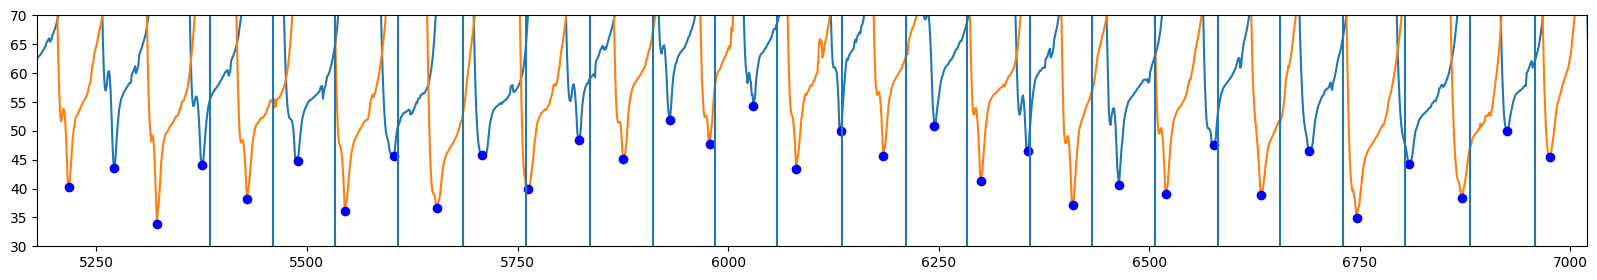

In [87]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
plt.vlines(m2[0],0,500)
plt.ylim([30, 70])
plt.xlim([m2_start-20, m2_end+20])

# P2 - M3

In [88]:
m3_start = start_music[start_music[0]=='P2_M3'][1].item()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7500.0
9601.9863946


In [63]:
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [64]:
#all MUSIC M1
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [65]:
#all WALKING M3
steps_in_m3_range.count()/((m3_end-m3_start)/100/60)

99.90549916949495

In [66]:
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [67]:
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [68]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

102.89769367238321

In [69]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

(7480.0, 9621.9863946)

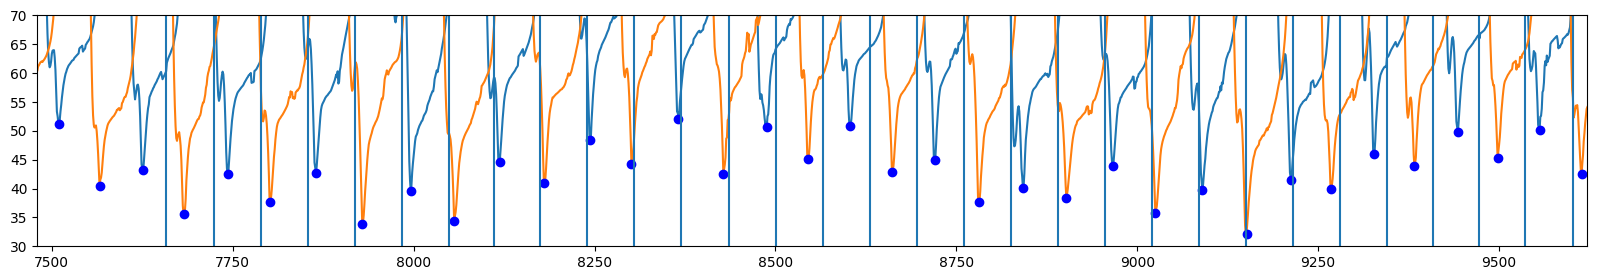

In [70]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m3[0],0,500)
plt.ylim([30, 70])
plt.xlim([m3_start-20, m3_end+20])